In [5]:
import harp
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from functools import reduce
import cv2
import numpy as np
import utils
from dotmap import DotMap

harp_reader = harp.create_reader('h1-device.yml', epoch=harp.REFERENCE_EPOCH)
session_data_reader = utils.SessionData()

harp_datafolder = r'../temp_data/2024-05-07T15-22-53/HarpDataH1/'
settings_datafolder = r'../temp_data/2024-05-07T15-22-53/SessionSettings/'

In [6]:
# read experiment metadata
session_settings = utils.load_json(session_data_reader, settings_datafolder)

print(session_settings)

                                                                     metadata
1904-01-01 00:26:54.430240  {'motorSettings': {'nominalPulseInterval': 200...


                            OpticalTrackingRead0X  OpticalTrackingRead0Y  \
Time                                                                       
1904-01-01 00:26:54.430240                     47                      0   
1904-01-01 00:26:54.440256                     47                      0   
1904-01-01 00:26:54.450240                     45                      0   
1904-01-01 00:26:54.460256                     47                      1   
1904-01-01 00:26:54.470240                     47                      0   
...                                           ...                    ...   
1904-01-01 00:27:31.680256                   -712                   -108   
1904-01-01 00:27:31.690240                   -698                   -105   
1904-01-01 00:27:31.700256                   -690                   -100   
1904-01-01 00:27:31.710240                   -707                   -106   
1904-01-01 00:27:31.720256                   -692                   -104   

           

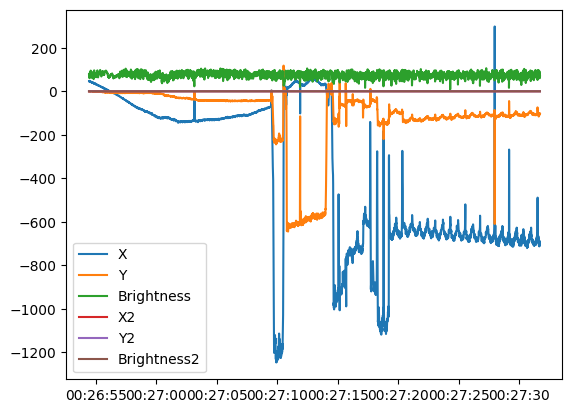

In [7]:
# read harp device streams
flow_sensor = utils.load(harp_reader.OpticalTrackingRead, harp_datafolder)

print(flow_sensor)

plt.figure()
plt.plot(flow_sensor['OpticalTrackingRead0X'], label='X')
plt.plot(flow_sensor['OpticalTrackingRead0Y'], label='Y')
plt.plot(flow_sensor['OpticalTrackingRead0Brightness'], label='Brightness')
plt.plot(flow_sensor['OpticalTrackingRead1X'], label='X2')
plt.plot(flow_sensor['OpticalTrackingRead1Y'], label='Y2')
plt.plot(flow_sensor['OpticalTrackingRead1Brightness'], label='Brightness2')
plt.legend()